<a href="https://colab.research.google.com/github/grishmajoshi/Amazon-Reviews-Classification/blob/main/AMAZON_FOOD_REVIEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AMAZON FOOD REVIEW - SENTIMENT ANALYSIS


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import re

from sklearn.model_selection import train_test_split 
from sklearn.metrics import *
from sklearn.naive_bayes import * 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from wordcloud import WordCloud, STOPWORDS

## Reading data

In [ ]:
!gdown 1kcGlBIg5842GQpD8kyPvjFmS-uPqcbkC

Downloading...
From: https://drive.google.com/uc?id=1kcGlBIg5842GQpD8kyPvjFmS-uPqcbkC
To: /content/Reviews.csv
100% 301M/301M [00:02<00:00, 135MB/s]


In [ ]:
df = pd.read_csv('Reviews.csv')

In [ ]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [ ]:
reviews = df.copy()
#display data
reviews.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
reviews["sentiment"] = reviews["Score"].apply(lambda score: "positive" if score > 3 else "negative")
reviews["usefulScore"] = (reviews["HelpfulnessNumerator"]/reviews["HelpfulnessDenominator"]).apply(lambda n: "useful" if n > 0.8 else "useless")
reviews.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment,usefulScore
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,useful
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,useless
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive,useful
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative,useful
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive,useless


In [ ]:
#Rows having overall score equal to 5
reviews[reviews.Score == 5].head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment,usefulScore
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,useful
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive,useless
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,positive,useless
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,positive,useless
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,positive,useful


In [ ]:
#Rows having overall score equal to 1
reviews[reviews.Score == 1].head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment,usefulScore
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,useless
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,negative,useful
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",negative,useless
50,51,B001EO5QW8,A108P30XVUFKXY,Roberto A,0,7,1,1203379200,Don't like it,"This oatmeal is not good. Its mushy, soft, I d...",negative,useless
62,63,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,1,1215302400,stale product.,Arrived in 6 days and were so stale i could no...,negative,useful


## Feature extraction from reviewsText 
Assign new dimension to each word and give the word counts

In [ ]:
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText

reviews.dropna(inplace= True)
reviews["summaryClean"] = reviews["Summary"].apply(cleanReviews)

train, test = train_test_split(reviews, test_size=0.2)
print("%d items in training data, %d in test data" % (len(train), len(test)))

454728 items in training data, 113683 in test data


### Using TfidfTransformer().fit_transofrm 
to fit the train and test data

In [ ]:
countVector = CountVectorizer(min_df = 1, ngram_range = (1, 4))
X_train_counts = countVector.fit_transform(train["summaryClean"])

#applying tfidf to term frequency
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_new_counts = countVector.transform(test["summaryClean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

y_train = train["sentiment"]
y_test = test["sentiment"]

prediction = dict()

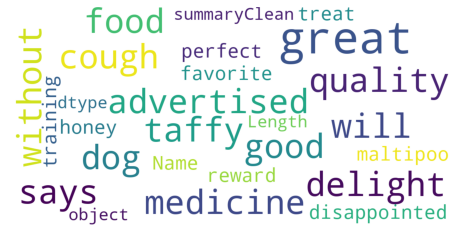

In [ ]:
stopwords = set(STOPWORDS)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(reviews["summaryClean"])

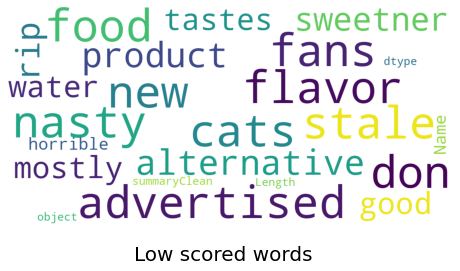

In [ ]:
show_wordcloud(reviews[reviews.Score == 1]["summaryClean"], title = "Low scored words")

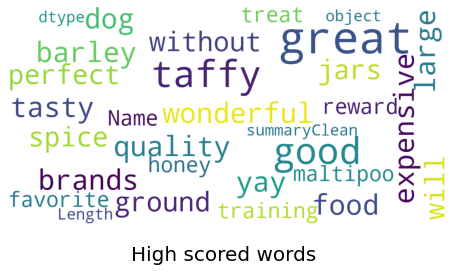

In [ ]:
show_wordcloud(reviews[reviews.Score == 5]["summaryClean"], title = "High scored words")

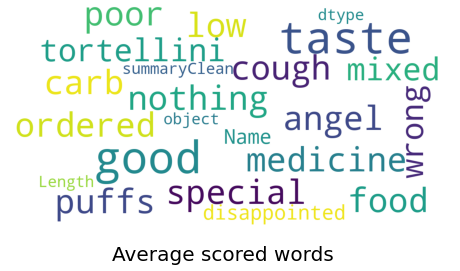

In [ ]:
show_wordcloud(reviews[reviews.Score == 2]["summaryClean"], title = "Average scored words")

## Multinomial Naïve Bayes learning method

In [ ]:
multiNB = MultinomialNB().fit(X_train_tfidf, y_train)
prediction['Multinomial'] = multiNB.predict(X_test_tfidf)

## Bernoulli Naïve Bayes learning method

In [ ]:
bernoNB = BernoulliNB().fit(X_train_tfidf, y_train)
prediction['Bernoulli'] = bernoNB.predict(X_test_tfidf)

## Logistic regression learning method

In [ ]:
logreg = LogisticRegression(C=1e5)
logreg_result = logreg.fit(X_train_tfidf, y_train)
prediction['Logistic'] = logreg.predict(X_test_tfidf)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
models = {'Logistic' : logreg, 'Multinomial':multiNB,'Bernoulli':bernoNB}

## Results

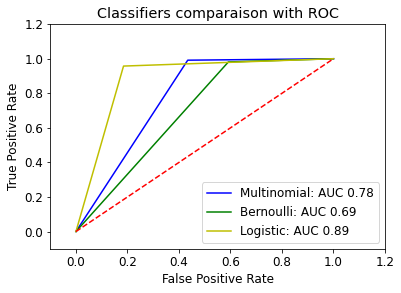

In [ ]:
def formatt(x):
    if x == 'negative':
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.map(formatt), vfunc(predicted))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
def show_result(y_test,y_pred):
  print("Confusion Matrix       = \n" ,ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot())
  plt.show()
  print("\nAccuracy of Model      = ",accuracy_score(y_test, y_pred))
  print("Precision of Model     = ",precision_score(y_test, y_pred,pos_label='positive'))
  print("Recall of Model        = " ,recall_score(y_test, y_pred,pos_label='positive'))
  print("F1 Score of Model      = " ,f1_score(y_test, y_pred,pos_label='positive'))

### Visualize the accuracy, recall and f1-score for Logistic Regression

Confusion Matrix       = 


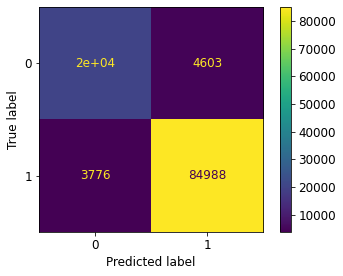


Accuracy of Model      =  0.9262950485120907
Precision of Model     =  0.9486220714134233
Recall of Model        =  0.9574602316254337
F1 Score of Model      =  0.953020661041182


In [ ]:
show_result(y_test,prediction['Logistic'])

### Visualize the accuracy, recall and f1-score for Naive Bayes Berrnoulli

Confusion Matrix       = 


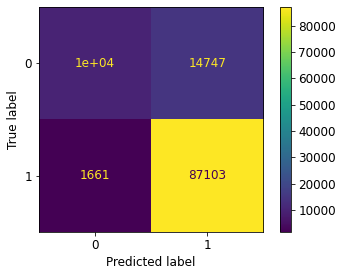


Accuracy of Model      =  0.8556688335107272
Precision of Model     =  0.8552086401570937
Recall of Model        =  0.981287458879726
F1 Score of Model      =  0.9139202786783762


In [ ]:
show_result(y_test,prediction['Bernoulli'])

### Visualize the accuracy, recall and f1-score for Naive Bayes Multinomial

Confusion Matrix       = 


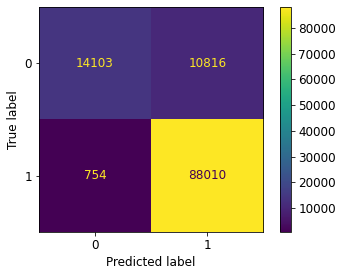


Accuracy of Model      =  0.8982257681447534
Precision of Model     =  0.8905551170744541
Recall of Model        =  0.9915055653192736
F1 Score of Model      =  0.9383229383229382


In [ ]:
show_result(y_test,prediction['Multinomial'])

### Displaying words depicting the best and worst features
using Logistic Model since it gave us the best results

In [ ]:
features = countVector.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(features, logreg_result.coef_[0])),
    columns = ['feature', 'coefficient'])
feature_coefs.sort_values(by='coefficient')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,feature,coefficient
1071065,yuck,-72.208822
1053477,worst,-67.376170
246661,disappointed,-51.196440
457581,horrible,-42.395854
618670,nasty,-38.394670
...,...,...
1047502,wonderful,31.620410
447398,heaven,36.078286
299407,fantastic,36.676942
88132,best,42.182589


In [ ]:
feature_coefs.sort_values(by='coefficient').tail(10)

,feature,coefficient
19007,amazing,28.697881
715229,perfect,28.805197
5208,addictive,29.024011
639432,not bad,29.189346
296415,fabulous,29.701606
1047502,wonderful,31.620410
447398,heaven,36.078286
299407,fantastic,36.676942
88132,best,42.182589
640059,not bitter,49.176878


In [ ]:
feature_coefs.sort_values(by='coefficient').head(10)

,feature,coefficient
1071065,yuck,-72.208822
1053477,worst,-67.376170
246661,disappointed,-51.196440
457581,horrible,-42.395854
618670,nasty,-38.394670
66706,awful,-38.068464
247147,disappointing,-36.700683
894874,terrible,-34.630348
643313,not good,-34.229613
247443,disappointment,-33.786770


### Testing the sentiments of few reviews 

In [ ]:
def get_sentiment(model, testData):
    testCounts = countVector.transform([testData])
    testTfidf = tfidf_transformer.transform(testCounts)
    for mod, clf in model.items():
        result = clf.predict(testTfidf)[0]
        probability = clf.predict_proba(testTfidf)[0]
        print(f"Text Classified by {mod} Model is {result.upper()}: negative prob {round(probability[0],4)}, positive prob {round(probability[1],4)}")

In [ ]:
get_sentiment(models, "not so good")

Text Classified by Logistic Model is NEGATIVE: negative prob 1.0, positive prob 0.0
Text Classified by Multinomial Model is NEGATIVE: negative prob 0.7051, positive prob 0.2949
Text Classified by Bernoulli Model is POSITIVE: negative prob 0.0543, positive prob 0.9457


In [ ]:
get_sentiment(models, "so good")

Text Classified by Logistic Model is POSITIVE: negative prob 0.0, positive prob 1.0
Text Classified by Multinomial Model is POSITIVE: negative prob 0.0457, positive prob 0.9543
Text Classified by Bernoulli Model is POSITIVE: negative prob 0.0, positive prob 1.0


In [ ]:
get_sentiment(models,"I love Chandigarh University")

Text Classified by Logistic Model is POSITIVE: negative prob 0.0005, positive prob 0.9995
Text Classified by Multinomial Model is POSITIVE: negative prob 0.0919, positive prob 0.9081
Text Classified by Bernoulli Model is POSITIVE: negative prob 0.0, positive prob 1.0
